In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Análise Notebook Pessoal

Análise feita usando meu notebook pessoal. Configurações da máquina:
- SO: Windows 10 64bits 
- Modelo de hardware: Aspire A315-41
- Memória ram: 12 GB DDR4
- Processador: AMD Ryzen 5 2500U
- Placa de vídeo: Radeon Vega Mobile Gfx 2.00 GHz integrada no processador
- Disco rígido: 790 GB HDD

## Procurando números primos

### Criando Dataset

In [2]:
df_primos = pd.read_csv("dataset-primos.csv")

In [3]:
df_primos = df_primos.sort_values(by="NumThreads")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-primos.csv"
df_primos.to_csv(output_file, index=False)

### Questão 1

#### a)

In [4]:
# Ordenar os dados pelo número máximo de primos
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
uso_cpu = df_primos_qt_01.sort_values(by="MeanUtilization", ascending=True)

uso_cpu = uso_cpu[["NumThreads", "MeanUtilization"]]
display(uso_cpu)

,NumThreads,MeanUtilization
5,2,0.800058
18,6,0.922301
16,4,0.932667
12,32,0.990848
17,40,0.995675
3,16,0.995765
19,8,0.997252
13,34,0.997740
1,12,0.998088
0,10,0.998327


##### Gráfico 1

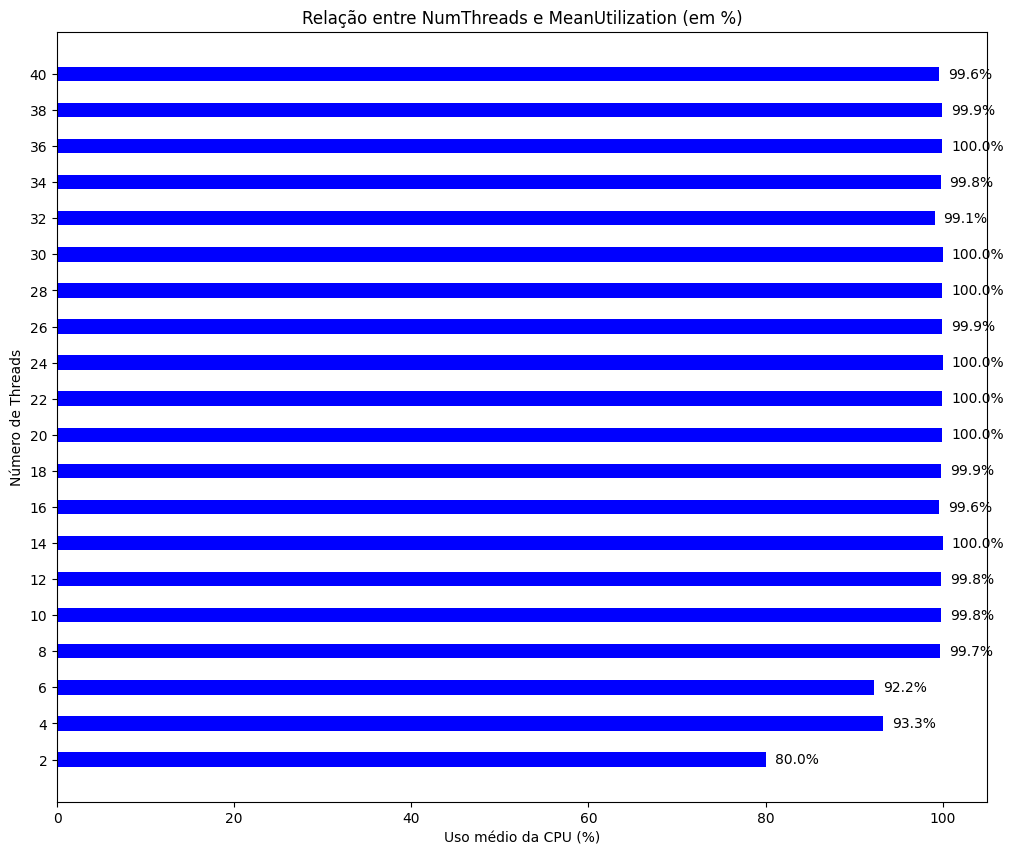

In [5]:
# Convertendo valores para porcentagem
df_primos_qt_01["MeanUtilizationPercent"] = df_primos_qt_01["MeanUtilization"] * 100

plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["MeanUtilizationPercent"], color='b')

for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width():.1f}%',  # Valor formatado como porcentagem
        va='center'
    )

num_threads = df_primos_qt_01["NumThreads"]

plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))
plt.title("Relação entre NumThreads e MeanUtilization (em %)")
plt.xlabel("Uso médio da CPU (%)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_uso_cpu.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


#### b)

In [6]:
# Ordenar os dados pelo número de threads
df_primos_qt_01 = df_primos[df_primos["NumeroMaximo"]==110000]
temp_total_exec = df_primos_qt_01.sort_values(by="ElapsedTime", ascending=True)

# Exibir apenas as colunas desejadas
temp_total_exec = temp_total_exec[["NumThreads", "MeanUtilization","ElapsedTime"]]
display(temp_total_exec)

,NumThreads,MeanUtilization,ElapsedTime
2,14,1.000000,3651
3,16,0.995765,3680
8,24,1.000000,3727
7,22,0.999539,3744
9,26,0.998946,3756
15,38,0.999477,3758
6,20,0.999562,3795
1,12,0.998088,3798
4,18,0.998597,3831
14,36,0.999681,3916


##### Gráfico 2

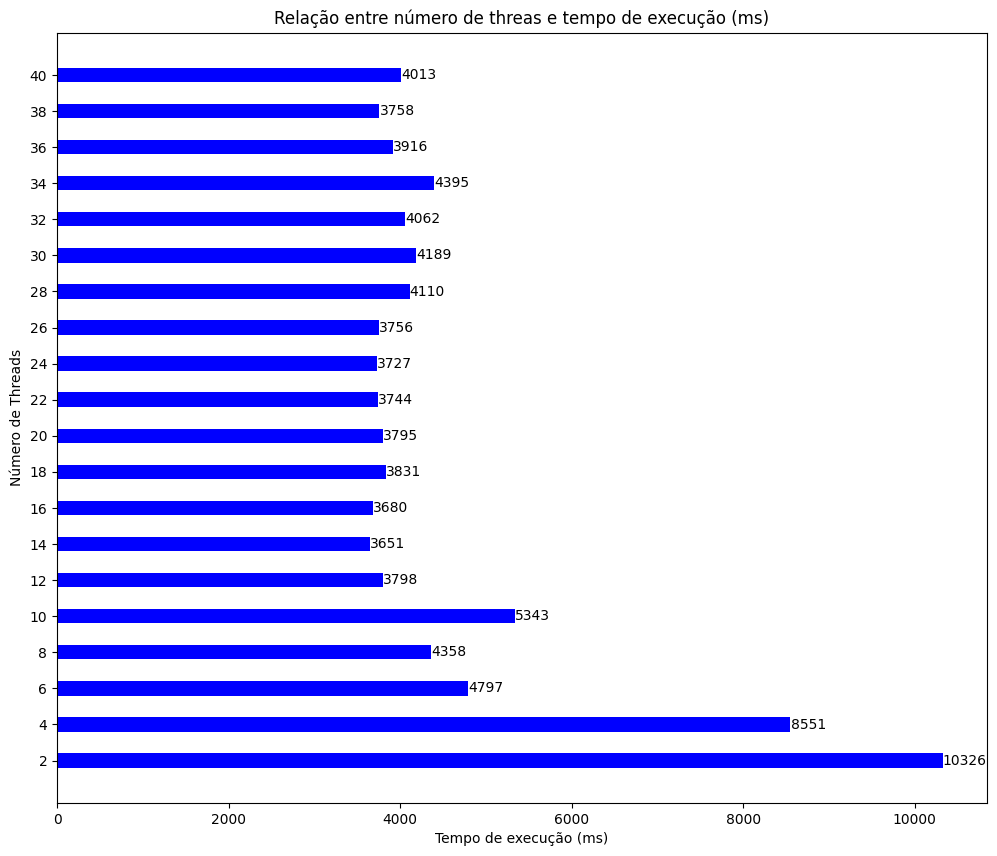

In [7]:
plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos_qt_01["NumThreads"], df_primos_qt_01["ElapsedTime"], color='b')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width()}',  # Valor formatado como porcentagem
        va='center'
    )

# Espaçamento entre as barras
num_threads = df_primos_qt_01["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

plt.title("Relação entre número de threas e tempo de execução (ms)")
plt.xlabel("Tempo de execução (ms)")
plt.ylabel("Número de Threads")

plt.savefig('grafico_temp_execucao.jpeg', format='jpeg', bbox_inches='tight')

plt.show()


### 2    

#### a)

In [8]:
# Ordenar os dados pelo número de threads
df_primos_qt_02 = df_primos[df_primos["NumThreads"]==20]
temp_exec = df_primos_qt_02.sort_values(by="ElapsedTime", ascending=True)

temp_exec = temp_exec[["NumeroMaximo","ElapsedTime"]]
display(temp_exec)

,NumeroMaximo,ElapsedTime
6,110000,3795


##### Gráficos 3 e 4

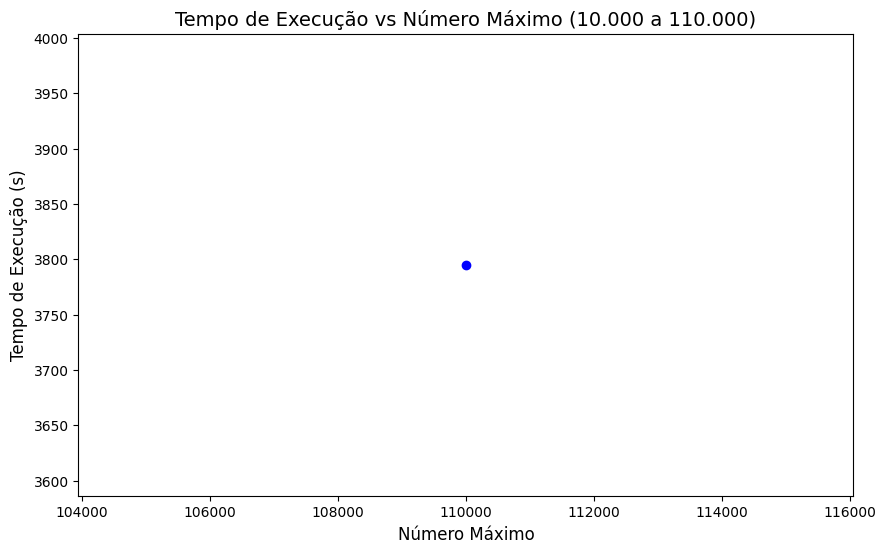

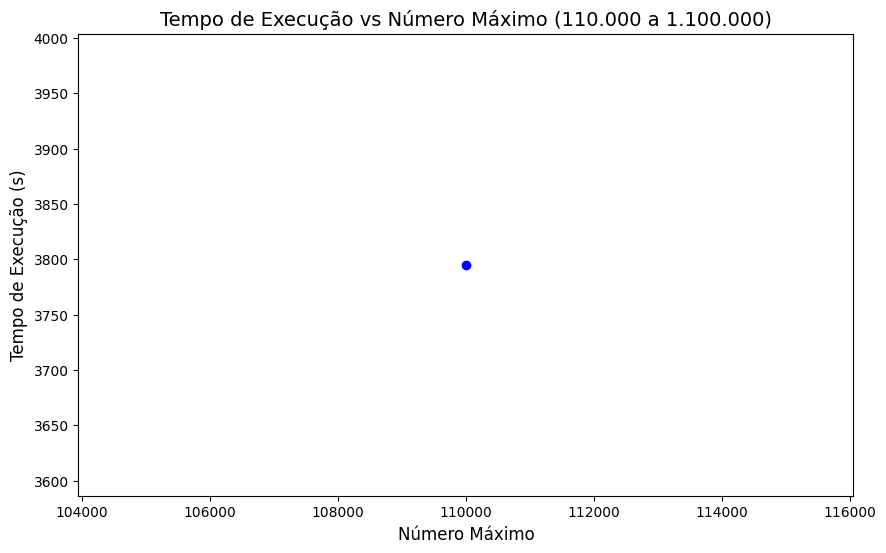

In [9]:
df_intervalo1 = temp_exec[temp_exec["NumeroMaximo"] <= 110000]  # Valores menores ou iguais a 110000
df_intervalo2 = temp_exec[temp_exec["NumeroMaximo"] >= 110000]  # Valores maiores ou iguais a 110000

df_intervalo1 = df_intervalo1.sort_values(by="ElapsedTime", ascending=True)

# Gerar o primeiro gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='red', label='Linha de Execução')
plt.scatter(df_intervalo1["NumeroMaximo"], df_intervalo1["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (10.000 a 110.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

df_intervalo2 = df_intervalo2.sort_values(by="ElapsedTime", ascending=True)

# Gerar o segundo gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='red', label='Linha de Execução')
plt.scatter(df_intervalo2["NumeroMaximo"], df_intervalo2["ElapsedTime"], color='blue', zorder=5)
plt.xlabel("Número Máximo", fontsize=12)
plt.ylabel("Tempo de Execução (s)", fontsize=12)
plt.title("Tempo de Execução vs Número Máximo (110.000 a 1.100.000)", fontsize=14)

plt.savefig('grafico_escalabilidade_exec_02.jpeg', format='jpeg', bbox_inches='tight')


plt.show()

## Fazendo acessos à memória

### Criando dataset

In [10]:
df_memoria = pd.read_csv("dataset-memoria.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset-memoria.csv'

In [11]:
df_memoria = df_memoria.sort_values(by="KBinMemory")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-memoria.csv"
df_memoria.to_csv(output_file, index=False)

### Questão 1

#### a)

In [12]:
tempo_busca = df_memoria.sort_values(by="SearchTime",ascending=True)
tempo_busca = tempo_busca[["KBinMemory","SearchTime"]]
tempo_busca

,KBinMemory,SearchTime
0,1024,1776
1,10240,4103
2,20480,4968
3,30720,5316
5,51200,5456
4,40960,5594
6,61440,5630
7,71680,5692
8,81920,5725
9,92160,5741


##### Gráficos 5 e 6

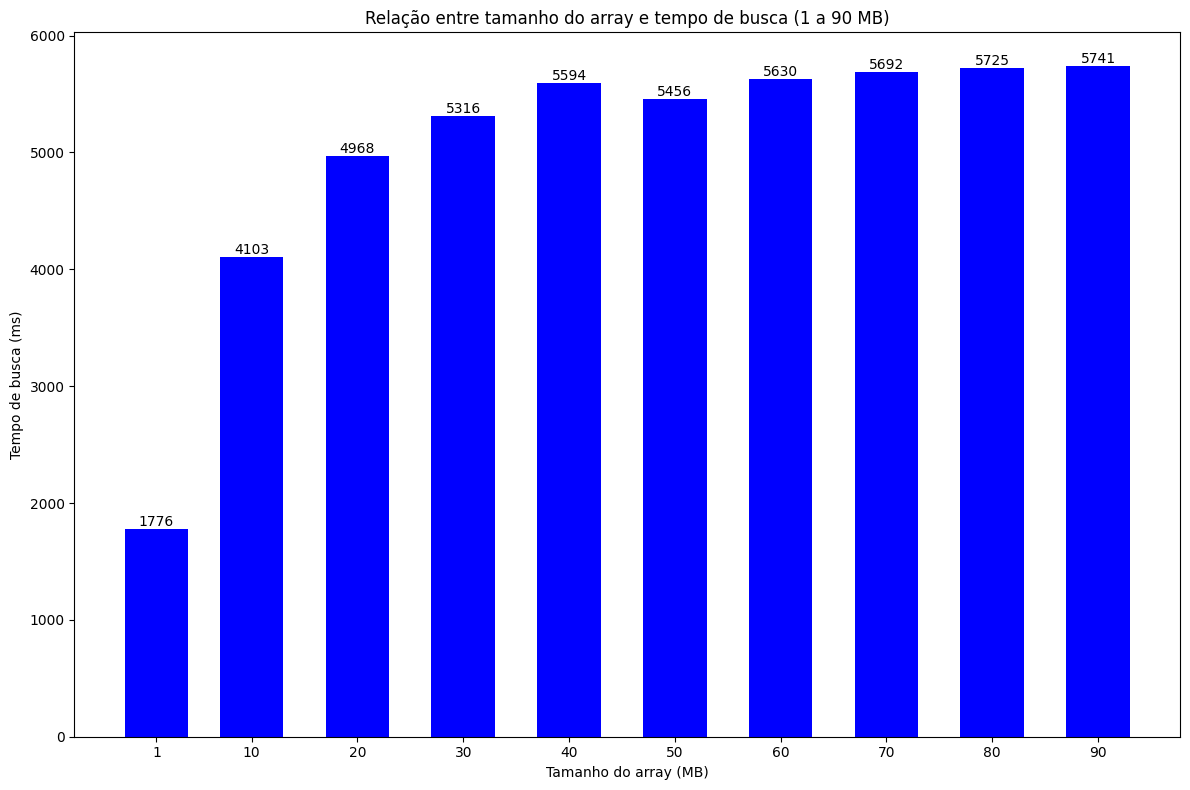

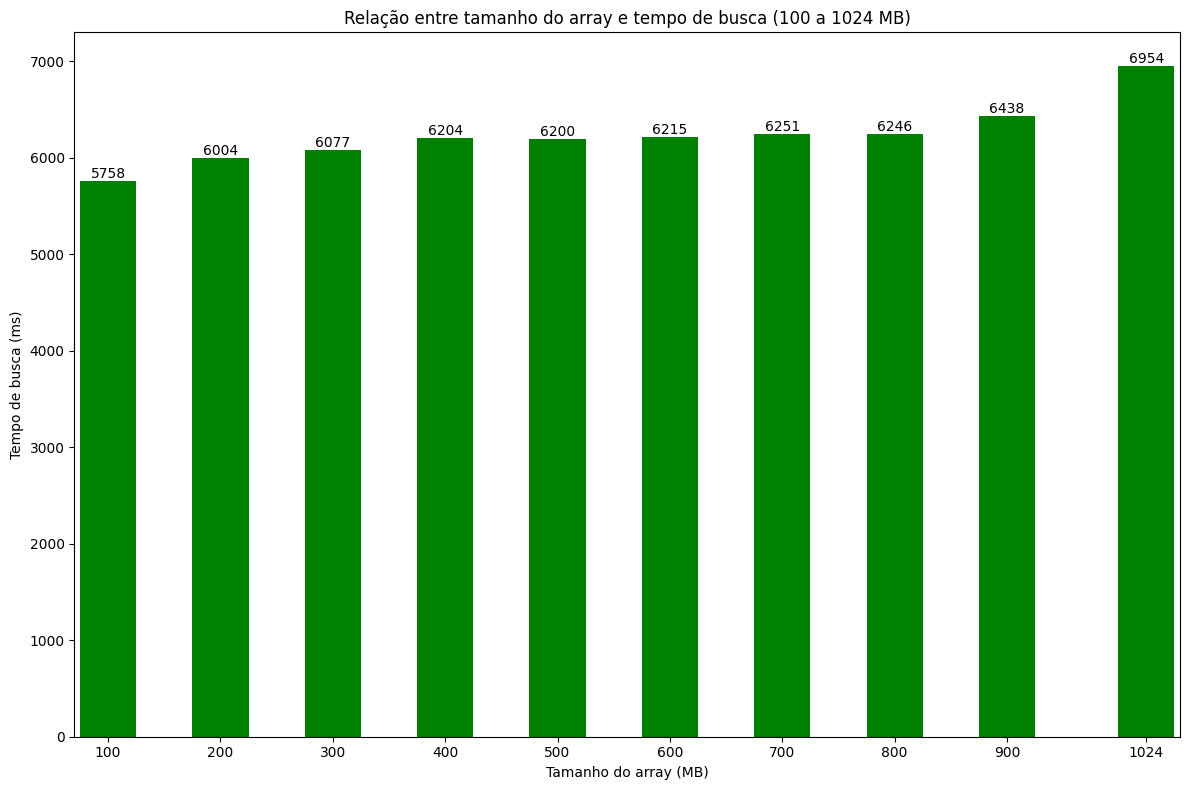

In [13]:
tempo_busca["MBinMemory"] = df_memoria["KBinMemory"] / 1024

# Separando os dados em dois subconjuntos:
df1 = tempo_busca[tempo_busca["MBinMemory"] <= 90]  # Valores de 1 a 90
df2 = tempo_busca[tempo_busca["MBinMemory"] >= 100]  # Valores de 100 até 1024

# Gráfico com valores de 1 a 90
plt.figure(figsize=(12, 8))
bars1 = plt.bar(df1["MBinMemory"], df1["SearchTime"], width=6, color='b')
plt.title("Relação entre tamanho do array e tempo de busca (1 a 90 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks([1] + list(range(10, 91, 10)))

for bar in bars1:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10) 

plt.tight_layout()

plt.savefig('grafico_escalabilidade_array_01.jpeg', format='jpeg', bbox_inches='tight')

plt.show()

# Gráfico com valores de 100 a 1024
plt.figure(figsize=(12, 8))
bars2 = plt.bar(df2["MBinMemory"], df2["SearchTime"], width=50, color='g')
plt.title("Relação entre tamanho do array e tempo de busca (100 a 1024 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")
plt.xticks(list(range(100, 1000, 100)) + [1024])
plt.xlim(70, 1054)

for bar in bars2:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  
    
plt.savefig('grafico_escalabilidade_array_02.jpeg', format='jpeg', bbox_inches='tight')
    
plt.tight_layout()
plt.show()